In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [79]:
y   = load('../../March2021/Observation_models/ObsY.joblib') 
CNN = load('../../March2021/Observation_models/CNNY.joblib') 
LR  = load('../../March2021/Observation_models/LRY.joblib')
SVR  = load('../../March2021/Observation_models/SVRY.joblib')

ACCESS_CM2_CNN = load('ACCESS-CM2-CNN-Y.joblib')
ACCESS_CM2_LR = load('ACCESS-CM2-LR-Y.joblib')
ACCESS_CM2_SVR = load('ACCESS-CM2-SVR-Y.joblib')

CanESM5_CNN = load('CanESM5-CNN-Y.joblib')
CanESM5_LR = load('CanESM5-LR-Y.joblib')
CanESM5_SVR = load('CanESM5-SVR-Y.joblib')

IITMESM_CNN = load('IITM-ESM-CNN-Y.joblib')
IITMESM_LR = load('IITM-ESM-LR-Y.joblib')
IITMESM_SVR = load('IITM-ESM-SVR-Y.joblib')

INM_CM4_8_CNN = load('INM-CM4-8-CNN-Y.joblib')
INM_CM4_8_LR = load('INM-CM4-8-LR-Y.joblib')
INM_CM4_8_SVR = load('INM-CM4-8-SVR-Y.joblib')

INM_CM5_0_CNN = load('INM-CM5-0-CNN-Y.joblib')
INM_CM5_0_LR = load('INM-CM5-0-LR-Y.joblib')
INM_CM5_0_SVR = load('INM-CM5-0-SVR-Y.joblib')

IPSL_CM6A_LR_CNN = load('IPSL-CM6A-LR-CNN-Y.joblib')
IPSL_CM6A_LR_LR = load('IPSL-CM6A-LR-LR-Y.joblib')
IPSL_CM6A_LR_SVR = load('IPSL-CM6A-LR-SVR-Y.joblib')

MIROC6_CNN = load('MIROC6-CNN-Y.joblib')
MIROC6_LR = load('MIROC6-LR-Y.joblib')
MIROC6_SVR = load('MIROC6-SVR-Y.joblib')

MRI_ESM2_0_CNN = load('MRI-ESM2-0-CNN-Y.joblib')
MRI_ESM2_0_LR = load('MRI-ESM2-0-LR-Y.joblib')
MRI_ESM2_0_SVR = load('MRI-ESM2-0-SVR-Y.joblib')

MPI_ESM1_2_LR_CNN = load('MPI-ESM1-2-LR-CNN-Y.joblib')
MPI_ESM1_2_LR_LR = load('MPI-ESM1-2-LR-LR-Y.joblib')
MPI_ESM1_2_LR_SVR = load('MPI-ESM1-2-LR-SVR-Y.joblib')

MPI_ESM1_2_HR_CNN = load('MPI-ESM1-2-HR-CNN-Y.joblib')
MPI_ESM1_2_HR_LR = load('MPI-ESM1-2-HR-LR-Y.joblib')
MPI_ESM1_2_HR_SVR = load('MPI-ESM1-2-HR-SVR-Y.joblib')

EC_Earth3_CNN = load('EC-Earth3-CNN-Y.joblib')
EC_Earth3_LR = load('EC-Earth3-LR-Y.joblib')
EC_Earth3_SVR = load('EC-Earth3-SVR-Y.joblib')


In [73]:
def getFogMeanClim( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=list()
    
    for yr in range(1981,2015,1):
        dStart=datetime.datetime(yr-1, 12, 1)
        dEnd=datetime.datetime(yr, 1, 31)
        ySMean = dArray.sel(time=slice(dStart,dEnd)).mean(dim='time').values.tolist()
        #print(yAct)
        fg.append(ySMean)
        
    
    return fg

0.2832827324478178 0.11073566489111651 0.39090157008251325
0.2914971335929804 0.07509979884924804 0.25763477645070243
0.2875615752795163 0.10983858925229212 0.38196545955601524
time
0.2832827324478178 0.11073566489111651 0.39090157008251325
0.2914971335929804 0.07509979884924804 0.25763477645070243
0.2791679719029313 0.07406165427780687 0.26529423763395976
0.2875615752795163 0.10983858925229212 0.38196545955601524
0.2890850498395808 0.08033419652902235 0.2778912177354085
0.2739883038927527 0.07618809412585462 0.2780706075529302
0.27422821609412923 0.06679516402558507 0.2435750958707237
0.2725136415923343 0.0612937911719614 0.22492008405088798
0.27286869462798624 0.04802114691261873 0.175986281526681
0.28642721035901236 0.08084183540731116 0.28224216304722843
0.2858078133533983 0.06516085231369026 0.2279883518548864
0.28240734864683714 0.06083556149059752 0.21541777075594118
0.28174897984546776 0.0830055637297104 0.29460821393297276
0.288932422942975 0.07294249021468724 0.25245519167325

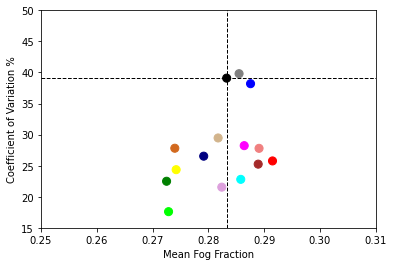

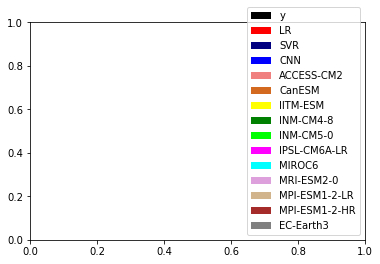

In [80]:
fO=getFogMeanClim(y)
#fO
print(st.mean(fO),st.stdev(fO),st.stdev(fO)/st.mean(fO))
fLR=getFogMeanClim(LR)
#fO
print(st.mean(fLR),st.stdev(fLR),st.stdev(fLR)/st.mean(fLR))
fCNN=getFogMeanClim(CNN)
#fO
print(st.mean(fCNN),st.stdev(fCNN),st.stdev(fCNN)/st.mean(fCNN))
print('time')

fMean=list()
fCV=list()
fList=(y,LR,SVR,CNN,ACCESS_CM2_CNN,CanESM5_CNN,IITMESM_CNN,INM_CM4_8_CNN,INM_CM5_0_CNN ,IPSL_CM6A_LR_CNN,MIROC6_CNN,MRI_ESM2_0_CNN, MPI_ESM1_2_LR_CNN, MPI_ESM1_2_HR_CNN,EC_Earth3_CNN)
for fL in fList :
    ts=getFogMeanClim(fL)
    fMean.append(st.mean(ts))
    fCV.append(st.stdev(ts)/st.mean(ts)*100.0)
    
    print(st.mean(ts),st.stdev(ts),st.stdev(ts)/st.mean(ts))

import matplotlib.patches as mpatches
classes = ['y','LR','SVR','CNN','ACCESS-CM2','CanESM','IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR','MIROC6','MRI-ESM2-0','MPI-ESM1-2-LR','MPI-ESM1-2-HR','EC-Earth3']
class_colours = ['black','red','navy','blue','lightcoral','chocolate','yellow','green','lime','magenta','aqua','plum','tan','brown','grey']

figure, axes = plt.subplots()
plt.scatter(fMean, fCV, c=class_colours, s=65)
plt.ylim(top=50) #ymax is your value
plt.ylim(bottom=15) #ymin is your value
plt.xlim(right=0.31) #xmax is your value
plt.xlim(left=0.25) #xmin is your value
plt.xlabel('Mean Fog Fraction')
plt.ylabel('Coefficient of Variation %')
x1, y1 = [fMean[0], fMean[0]], [15, 50]
x2, y2 = [0.25, 0.31], [fCV[0], fCV[0]]
plt.plot(x1, y1,'--',  x2, y2,'--', linewidth=1,color='black')
#c=plt.Circle(( fMean[0] ,fCV[0] ), fMean[0]*10/100.0 )
#axes.set_aspect( 1 )
#axes.add_artist( c)
plt.show()


recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)

0.2832827324478178 0.11073566489111651 0.39090157008251325
0.2914971335929804 0.07509979884924804 0.25763477645070243
0.2875615752795163 0.10983858925229212 0.38196545955601524
time
0.2832827324478178 0.11073566489111651 0.39090157008251325
0.2914971335929804 0.07509979884924804 0.25763477645070243
0.2791679719029313 0.07406165427780687 0.26529423763395976
0.2875615752795163 0.10983858925229212 0.38196545955601524
-0.4515769571809633 0.041347546183750084 -0.09156256874103658
-3.143223279719074 0.03669442732024505 -0.011674139586903484
-1.2952921740844683 0.045251039398755334 -0.03493500563356637
-1.6705620684177438 0.02070104343585626 -0.012391663756296734
-1.0263787128576967 0.019855411696698164 -0.01934511252811908
-3.308544815359186 0.034967128944720274 -0.010568733656679858
-0.2745504116930203 0.05490817412130414 -0.19999304966513015
-2.254754419351647 0.04817628786666615 -0.021366534400903494
-1.1086352554407986 0.05246999094740131 -0.0473284524282416
-0.3516612431404204 0.0561358

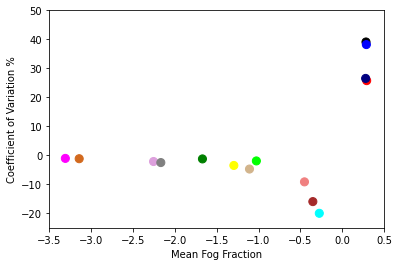

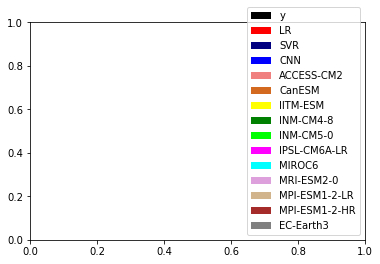

In [86]:
fO=getFogMeanClim(y)
#fO
print(st.mean(fO),st.stdev(fO),st.stdev(fO)/st.mean(fO))
fLR=getFogMeanClim(LR)
#fO
print(st.mean(fLR),st.stdev(fLR),st.stdev(fLR)/st.mean(fLR))
fCNN=getFogMeanClim(CNN)
#fO
print(st.mean(fCNN),st.stdev(fCNN),st.stdev(fCNN)/st.mean(fCNN))
print('time')

fMean=list()
fCV=list()
fList=(y,LR,SVR,CNN,ACCESS_CM2_LR,CanESM5_LR,IITMESM_LR,INM_CM4_8_LR,INM_CM5_0_LR ,IPSL_CM6A_LR_LR,MIROC6_LR,MRI_ESM2_0_LR, MPI_ESM1_2_LR_LR, MPI_ESM1_2_HR_LR,EC_Earth3_LR)
for fL in fList :
    ts=getFogMeanClim(fL)
    fMean.append(st.mean(ts))
    fCV.append(st.stdev(ts)/st.mean(ts)*100.0)
    
    print(st.mean(ts),st.stdev(ts),st.stdev(ts)/st.mean(ts))

import matplotlib.patches as mpatches
classes = ['y','LR','SVR','CNN','ACCESS-CM2','CanESM','IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR','MIROC6','MRI-ESM2-0','MPI-ESM1-2-LR','MPI-ESM1-2-HR','EC-Earth3']
class_colours = ['black','red','navy','blue','lightcoral','chocolate','yellow','green','lime','magenta','aqua','plum','tan','brown','grey']

figure, axes = plt.subplots()
plt.scatter(fMean, fCV, c=class_colours, s=65)
plt.ylim(top=50) #ymax is your value
plt.ylim(bottom=-25) #ymin is your value
plt.xlim(right=.5) #xmax is your value
plt.xlim(left=-3.5) #xmin is your value
plt.xlabel('Mean Fog Fraction')
plt.ylabel('Coefficient of Variation %')
x1, y1 = [fMean[0], fMean[0]], [-20, 50]
x2, y2 = [-4.0, 0.31], [fCV[0], fCV[0]]
#plt.plot(x1, y1,'--',  x2, y2,'--', linewidth=1,color='black')
#c=plt.Circle(( fMean[0] ,fCV[0] ), fMean[0]*10/100.0 )
#axes.set_aspect( 1 )
#axes.add_artist( c)
plt.show()


recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)
    

0.2832827324478178 0.11073566489111651 0.39090157008251325
0.2914971335929804 0.07509979884924804 0.25763477645070243
0.2875615752795163 0.10983858925229212 0.38196545955601524
time
0.2832827324478178 0.11073566489111651 0.39090157008251325
0.2914971335929804 0.07509979884924804 0.25763477645070243
0.2791679719029313 0.07406165427780687 0.26529423763395976
0.2875615752795163 0.10983858925229212 0.38196545955601524
-0.48595998528731776 0.04010243211560207 -0.08252208685843138
-2.9021347279632512 0.03460875940501463 -0.01192527661501898
-1.341070326838215 0.03974792284301333 -0.029638954831492943
-1.6834065521414356 0.024222608743456588 -0.014389042690040252
-1.0646095433628586 0.017865825278138566 -0.016781575357388306
-2.997728922335205 0.029394900141949686 -0.009805723233657603
-0.36732198620789885 0.051006104492070214 -0.13885938334004735
-2.2024376449155674 0.02960561438068222 -0.013442203210169512
-1.151803644358682 0.041724357692302594 -0.03622523500134824
-0.3748868885119535 0.05

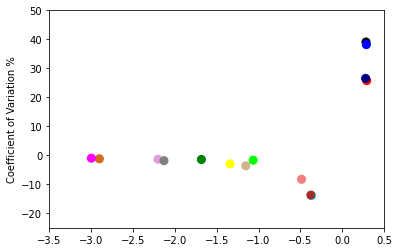

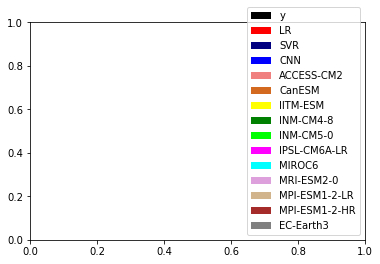

In [87]:
fO=getFogMeanClim(y)
#fO
print(st.mean(fO),st.stdev(fO),st.stdev(fO)/st.mean(fO))
fLR=getFogMeanClim(LR)
#fO
print(st.mean(fLR),st.stdev(fLR),st.stdev(fLR)/st.mean(fLR))
fCNN=getFogMeanClim(CNN)
#fO
print(st.mean(fCNN),st.stdev(fCNN),st.stdev(fCNN)/st.mean(fCNN))
print('time')

fMean=list()
fCV=list()
fList=(y,LR,SVR,CNN,ACCESS_CM2_SVR,CanESM5_SVR,IITMESM_SVR,INM_CM4_8_SVR,INM_CM5_0_SVR ,IPSL_CM6A_LR_SVR,MIROC6_SVR,MRI_ESM2_0_SVR, MPI_ESM1_2_LR_SVR, MPI_ESM1_2_HR_SVR,EC_Earth3_SVR)
for fL in fList :
    ts=getFogMeanClim(fL)
    fMean.append(st.mean(ts))
    fCV.append(st.stdev(ts)/st.mean(ts)*100.0)
    
    print(st.mean(ts),st.stdev(ts),st.stdev(ts)/st.mean(ts))

import matplotlib.patches as mpatches
classes = ['y','LR','SVR','CNN','ACCESS-CM2','CanESM','IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR','MIROC6','MRI-ESM2-0','MPI-ESM1-2-LR','MPI-ESM1-2-HR','EC-Earth3']
class_colours = ['black','red','navy','blue','lightcoral','chocolate','yellow','green','lime','magenta','aqua','plum','tan','brown','grey']

figure, axes = plt.subplots()
plt.scatter(fMean, fCV, c=class_colours, s=65)
plt.ylim(top=50) #ymax is your value
plt.ylim(bottom=-25) #ymin is your value
plt.xlim(right=.5) #xmax is your value
plt.xlim(left=-3.5) #xmin is your valueplt.xlabel('Mean Fog Fraction')
plt.ylabel('Coefficient of Variation %')
x1, y1 = [fMean[0], fMean[0]], [-20, 50]
x2, y2 = [-4.0, 0.31], [fCV[0], fCV[0]]
#plt.plot(x1, y1,'--',  x2, y2,'--', linewidth=1,color='black')
#c=plt.Circle(( fMean[0] ,fCV[0] ), fMean[0]*10/100.0 )
#axes.set_aspect( 1 )
#axes.add_artist( c)
plt.show()


recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)
    

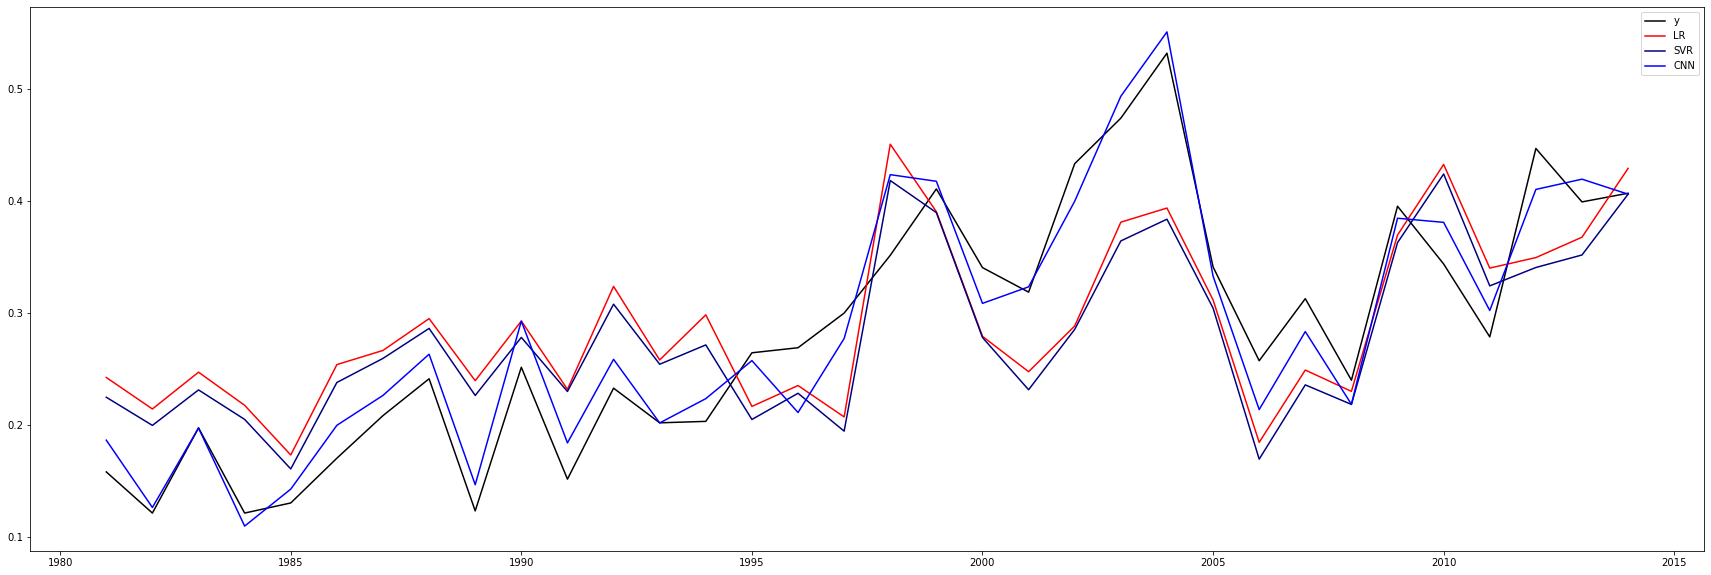

In [95]:
fig=plt.figure(figsize=[30,10])
X=np.arange(1981,2015)
fMean=list()
fCV=list()
classes = ['y','LR','SVR','CNN']
class_colours = ['black','red','navy','blue']
fList=(y,LR,SVR,CNN)
for (fL, cL, cO) in zip(fList,classes,class_colours):

    ts=getFogMeanClim(fL)
    fMean.append((ts))
    plt.plot(X,ts,label=cL, color=cO)
plt.legend()


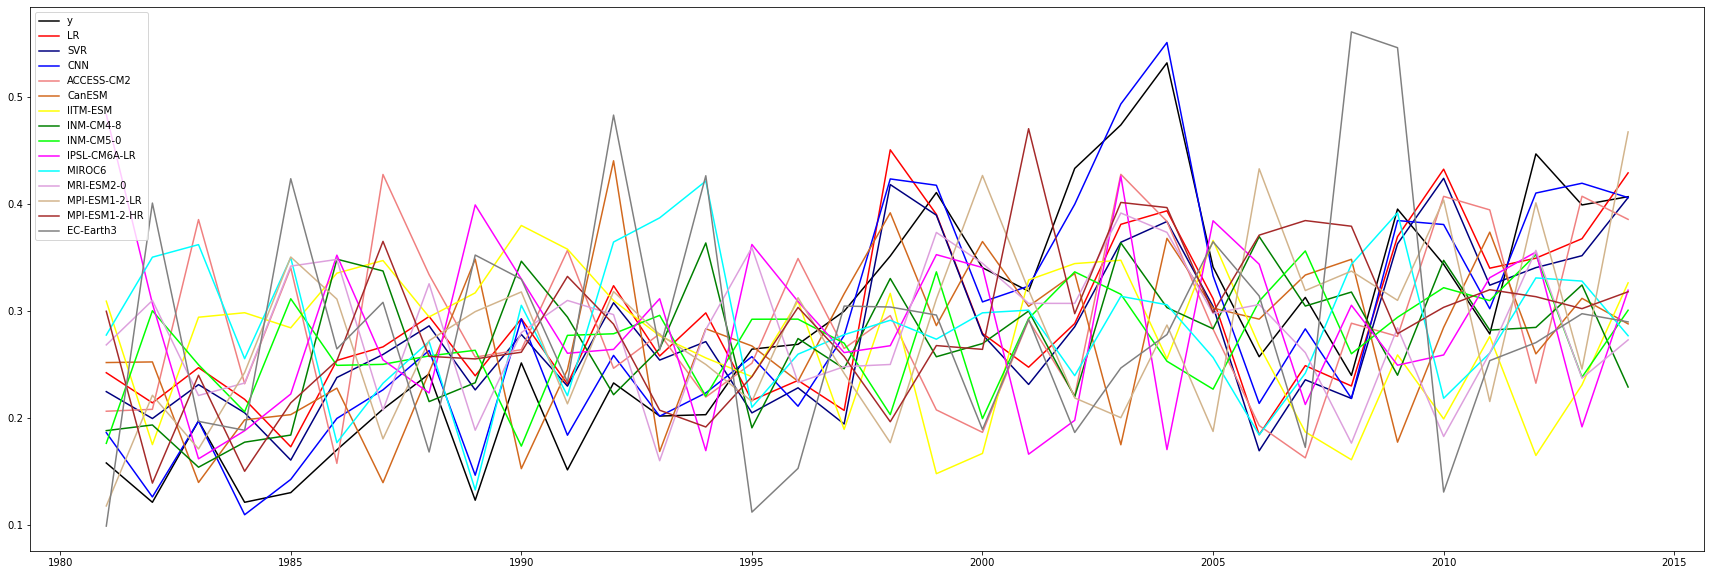

In [94]:
fig=plt.figure(figsize=[30,10])
X=np.arange(1981,2015)
fMean=list()
fCV=list()
classes = ['y','LR','SVR','CNN','ACCESS-CM2','CanESM','IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR','MIROC6','MRI-ESM2-0','MPI-ESM1-2-LR','MPI-ESM1-2-HR','EC-Earth3']
class_colours = ['black','red','navy','blue','lightcoral','chocolate','yellow','green','lime','magenta','aqua','plum','tan','brown','grey']
fList=(y,LR,SVR,CNN,ACCESS_CM2_CNN,CanESM5_CNN,IITMESM_CNN,INM_CM4_8_CNN,INM_CM5_0_CNN ,IPSL_CM6A_LR_CNN,MIROC6_CNN,MRI_ESM2_0_CNN, MPI_ESM1_2_LR_CNN, MPI_ESM1_2_HR_CNN,EC_Earth3_CNN)
for (fL, cL, cO) in zip(fList,classes,class_colours):

    ts=getFogMeanClim(fL)
    fMean.append((ts))
    plt.plot(X,ts,label=cL, color=cO)
plt.legend()


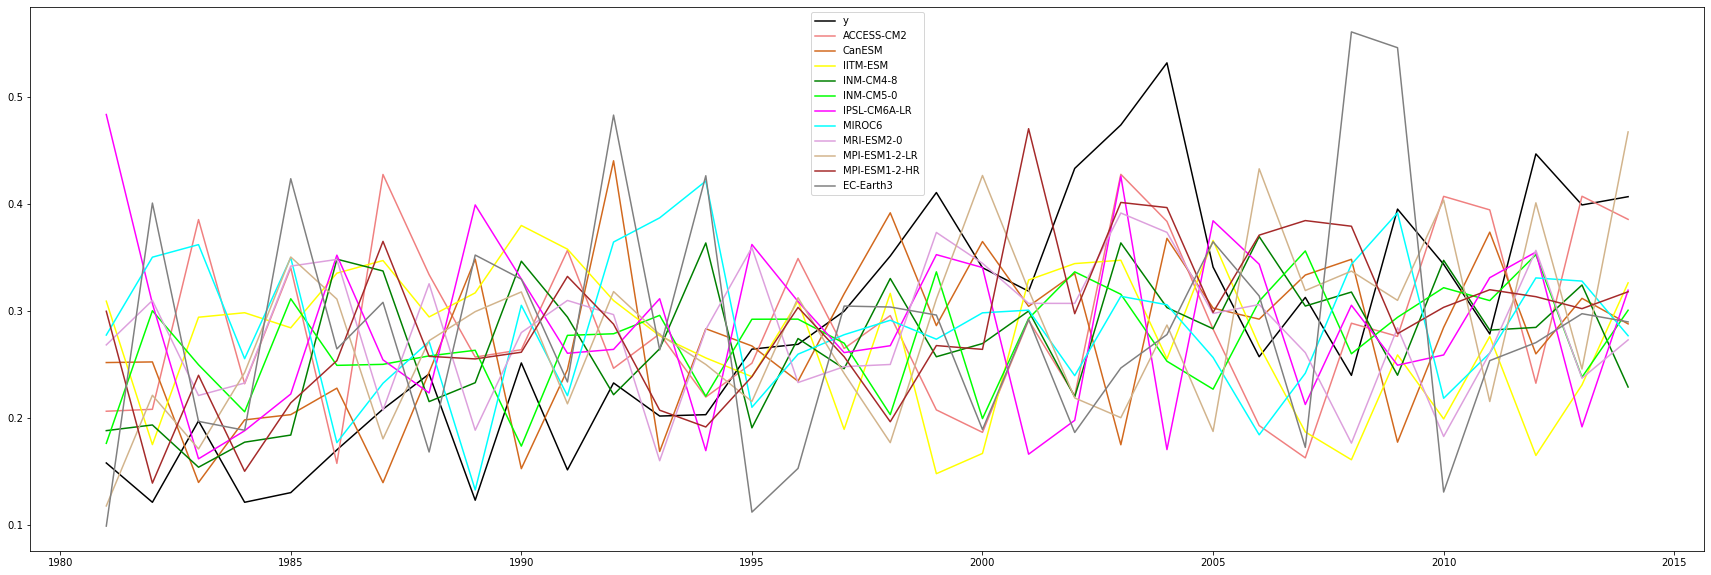

In [98]:
fig=plt.figure(figsize=[30,10])
X=np.arange(1981,2015)
fMean=list()
fCV=list()
classes = ['y','ACCESS-CM2','CanESM','IITM-ESM','INM-CM4-8','INM-CM5-0','IPSL-CM6A-LR','MIROC6','MRI-ESM2-0','MPI-ESM1-2-LR','MPI-ESM1-2-HR','EC-Earth3']
class_colours = ['black','lightcoral','chocolate','yellow','green','lime','magenta','aqua','plum','tan','brown','grey']
fList=(y,ACCESS_CM2_CNN,CanESM5_CNN,IITMESM_CNN,INM_CM4_8_CNN,INM_CM5_0_CNN ,IPSL_CM6A_LR_CNN,MIROC6_CNN,MRI_ESM2_0_CNN, MPI_ESM1_2_LR_CNN, MPI_ESM1_2_HR_CNN,EC_Earth3_CNN)
for (fL, cL, cO) in zip(fList,classes,class_colours):

    ts=getFogMeanClim(fL)
    fMean.append((ts))
    plt.plot(X,ts,label=cL, color=cO)
plt.legend()


In [9]:
fCNN=getFogMeanClim(CNN)
#fO
print(st.mean(fCNN),st.stdev(fCNN),st.stdev(fCNN)/st.mean(fCNN))

0.2875615752795163 0.10983858925229212 0.38196545955601524


In [10]:
def getFogcats( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    nf=list()
    medf=list()
    wdf=list()
    for yr in range(1981,2015,1):
        dStart=datetime.datetime(yr-1, 12, 1)
        dEnd=datetime.datetime(yr, 1, 31)
        yAct = dArray.sel(time=slice(dStart,dEnd))
        nf.append(yAct[yAct<0.040].shape[0])
        medf.append(yAct[(yAct<=0.46) & (yAct>=0.04)].shape[0])
        wdf.append(yAct[yAct>0.46].shape[0])
    
    return nf,medf,wdf

In [102]:
nO,medO,wdO=getFogcats(y)
nLR,medLR,wdLR=getFogcats(LR)
nSVR,medSVR,wdSVR=getFogcats(SVR)
nCNN,medCNN,wdCNN=getFogcats(CNN)
nACCESS_CM2_CNN,medACCESS_CM2_CNN,wdACCESS_CM2_CNN=getFogcats(ACCESS_CM2_CNN)
nACCESS_CM2_LR,medACCESS_CM2_LR,wdACCESS_CM2_LR=getFogcats(ACCESS_CM2_LR)
nCanESM5_CNN,medCanESM5_CNN,wdCanESM5_CNN=getFogcats(CanESM5_CNN)
nCanESM5_LR,medCanESM5_LR,wdCanESM5_LR=getFogcats(CanESM5_LR)
nIITMESM_CNN,medIITMESM_CNN,wdIITMESM_CNN=getFogcats(IITMESM_CNN)
nIITMESM_LR,medIITMESM_LR,wdIITMESM_LR=getFogcats(IITMESM_LR)
nINM_CM4_8_CNN,medINM_CM4_8_CNN,wdINM_CM4_8_CNN=getFogcats(INM_CM4_8_CNN)
nINM_CM4_8_LR,medINM_CM4_8_LR,wdINM_CM4_8_LR=getFogcats(INM_CM4_8_LR)
nINM_CM5_0_CNN,medINM_CM5_0_CNN,wdINM_CM5_0_CNN=getFogcats(INM_CM5_0_CNN)
nINM_CM5_0_LR,medINM_CM5_0_LR,wdINM_CM5_0_LR=getFogcats(INM_CM5_0_LR)
nIPSL_CM6A_LR_CNN,medIPSL_CM6A_LR_CNN,wdIPSL_CM6A_LR_CNN=getFogcats(IPSL_CM6A_LR_CNN)
nIPSL_CM6A_LR_LR,medIPSL_CM6A_LR_LR,wdIPSL_CM6A_LR_LR=getFogcats(IPSL_CM6A_LR_LR)
nMIROC6_CNN,medMIROC6_CNN,wdMIROC6_CNN=getFogcats(MIROC6_CNN)
nMIROC6_LR,medMIROC6_LR,wdMIROC6_LR=getFogcats(MIROC6_LR)
nMRI_ESM2_0_CNN,medMRI_ESM2_0_CNN,wdMRI_ESM2_0_CNN=getFogcats(MRI_ESM2_0_CNN)
nMRI_ESM2_0_LR,medMRI_ESM2_0_LR,wdMRI_ESM2_0_LR=getFogcats(MRI_ESM2_0_LR)
nMPI_ESM1_2_LR_CNN,medMPI_ESM1_2_LR_CNN,wdMPI_ESM1_2_LR_CNN=getFogcats(MPI_ESM1_2_LR_CNN)
nMPI_ESM1_2_LR_LR,medMPI_ESM1_2_LR_LR,wdMPI_ESM1_2_LR_LR=getFogcats(MPI_ESM1_2_LR_LR)
nMPI_ESM1_2_HR_CNN,medMPI_ESM1_2_HR_CNN,wdMPI_ESM1_2_HR_CNN=getFogcats(MPI_ESM1_2_HR_CNN)
nMPI_ESM1_2_HR_LR,medMPI_ESM1_2_HR_LR,wdMPI_ESM1_2_HR_LR=getFogcats(MPI_ESM1_2_HR_LR)
nEC_Earth3_CNN,medEC_Earth3_CNN,wdEC_Earth3_CNN=getFogcats(EC_Earth3_CNN)
nEC_Earth3_LR,medEC_Earth3_LR,wdEC_Earth3_LR=getFogcats(EC_Earth3_LR)

In [12]:
print(st.mean(nO),st.mean(medO),st.mean(wdO),st.stdev(nO),st.stdev(medO),st.stdev(wdO))
print(st.mean(nLR),st.mean(medLR),st.mean(wdLR),st.stdev(nLR),st.stdev(medLR),st.stdev(wdLR))
print(st.mean(nCNN),st.mean(medCNN),st.mean(wdCNN),st.stdev(nCNN),st.stdev(medCNN),st.stdev(wdCNN))
print(st.mean(nACCESS_CM2_LR),st.mean(medACCESS_CM2_LR),st.mean(wdACCESS_CM2_LR),st.stdev(nACCESS_CM2_LR),st.stdev(medACCESS_CM2_LR),st.stdev(wdACCESS_CM2_LR))
print(st.mean(nACCESS_CM2_CNN),st.mean(medACCESS_CM2_CNN),st.mean(wdACCESS_CM2_CNN),st.stdev(nACCESS_CM2_CNN),st.stdev(medACCESS_CM2_CNN),st.stdev(wdACCESS_CM2_CNN))
print(st.mean(nCanESM5_LR),st.mean(medCanESM5_LR),st.mean(wdCanESM5_LR),st.stdev(nCanESM5_LR),st.stdev(medCanESM5_LR),st.stdev(wdCanESM5_LR))
print(st.mean(nCanESM5_CNN),st.mean(medCanESM5_CNN),st.mean(wdCanESM5_CNN),st.stdev(nCanESM5_CNN),st.stdev(medCanESM5_CNN),st.stdev(wdCanESM5_CNN))
print(st.mean(nIITMESM_LR),st.mean(medIITMESM_LR),st.mean(wdIITMESM_LR),st.stdev(nIITMESM_LR),st.stdev(medIITMESM_LR),st.stdev(wdIITMESM_LR))
print(st.mean(nIITMESM_CNN),st.mean(medIITMESM_CNN),st.mean(wdIITMESM_CNN),st.stdev(nIITMESM_CNN),st.stdev(medIITMESM_CNN),st.stdev(wdIITMESM_CNN))
print(st.mean(nINM_CM5_0_LR),st.mean(medINM_CM5_0_LR),st.mean(wdINM_CM5_0_LR),st.stdev(nINM_CM5_0_LR),st.stdev(medINM_CM5_0_LR),st.stdev(wdINM_CM5_0_LR))
print(st.mean(nINM_CM5_0_CNN),st.mean(medINM_CM5_0_CNN),st.mean(wdINM_CM5_0_CNN),st.stdev(nINM_CM5_0_CNN),st.stdev(medINM_CM5_0_CNN),st.stdev(wdINM_CM5_0_CNN))
print(st.mean(nIPSL_CM6A_LR_LR),st.mean(medIPSL_CM6A_LR_LR),st.mean(wdIPSL_CM6A_LR_LR),st.stdev(nIPSL_CM6A_LR_LR),st.stdev(medIPSL_CM6A_LR_LR),st.stdev(wdIPSL_CM6A_LR_LR))
print(st.mean(nIPSL_CM6A_LR_CNN),st.mean(medIPSL_CM6A_LR_CNN),st.mean(wdIPSL_CM6A_LR_CNN),st.stdev(nIPSL_CM6A_LR_CNN),st.stdev(medIPSL_CM6A_LR_CNN),st.stdev(wdIPSL_CM6A_LR_CNN))
print(st.mean(nMIROC6_LR),st.mean(medMIROC6_LR),st.mean(wdMIROC6_LR),st.stdev(nMIROC6_LR),st.stdev(medMIROC6_LR),st.stdev(wdMIROC6_LR))
print(st.mean(nMIROC6_CNN),st.mean(medMIROC6_CNN),st.mean(wdMIROC6_CNN),st.stdev(nMIROC6_CNN),st.stdev(medMIROC6_CNN),st.stdev(wdMIROC6_CNN))
print(st.mean(nMRI_ESM2_0_LR),st.mean(medMRI_ESM2_0_LR),st.mean(wdMRI_ESM2_0_LR),st.stdev(nMRI_ESM2_0_LR),st.stdev(medMRI_ESM2_0_LR),st.stdev(wdMRI_ESM2_0_LR))
print(st.mean(nMRI_ESM2_0_CNN),st.mean(medMRI_ESM2_0_CNN),st.mean(wdMRI_ESM2_0_CNN),st.stdev(nMRI_ESM2_0_CNN),st.stdev(medMRI_ESM2_0_CNN),st.stdev(wdMRI_ESM2_0_CNN))
print(st.mean(nMPI_ESM1_2_LR_LR),st.mean(medMPI_ESM1_2_LR_LR),st.mean(wdMPI_ESM1_2_LR_LR),st.stdev(nMPI_ESM1_2_LR_LR),st.stdev(medMPI_ESM1_2_LR_LR),st.stdev(wdMPI_ESM1_2_LR_LR))
print(st.mean(nMPI_ESM1_2_LR_CNN),st.mean(medMPI_ESM1_2_LR_CNN),st.mean(wdMPI_ESM1_2_LR_CNN),st.stdev(nMPI_ESM1_2_LR_CNN),st.stdev(medMPI_ESM1_2_LR_CNN),st.stdev(wdMPI_ESM1_2_LR_CNN))
print(st.mean(nINM_CM4_8_LR),st.mean(medINM_CM4_8_LR),st.mean(wdINM_CM4_8_LR),st.stdev(nINM_CM4_8_LR),st.stdev(medINM_CM4_8_LR),st.stdev(wdINM_CM4_8_LR))
print(st.mean(nINM_CM4_8_CNN),st.mean(medINM_CM4_8_CNN),st.mean(wdINM_CM4_8_CNN),st.stdev(nINM_CM4_8_CNN),st.stdev(medINM_CM4_8_CNN),st.stdev(wdINM_CM4_8_CNN))
print(st.mean(nMPI_ESM1_2_HR_LR),st.mean(medMPI_ESM1_2_HR_LR),st.mean(wdMPI_ESM1_2_HR_LR),st.stdev(nMPI_ESM1_2_HR_LR),st.stdev(medMPI_ESM1_2_HR_LR),st.stdev(wdMPI_ESM1_2_HR_LR))
print(st.mean(nMPI_ESM1_2_HR_CNN),st.mean(medMPI_ESM1_2_HR_CNN),st.mean(wdMPI_ESM1_2_HR_CNN),st.stdev(nMPI_ESM1_2_HR_CNN),st.stdev(medMPI_ESM1_2_HR_CNN),st.stdev(wdMPI_ESM1_2_HR_CNN))
print(st.mean(nEC_Earth3_LR),st.mean(medEC_Earth3_LR),st.mean(wdEC_Earth3_LR),st.stdev(nEC_Earth3_LR),st.stdev(medEC_Earth3_LR),st.stdev(wdEC_Earth3_LR))
print(st.mean(nEC_Earth3_CNN),st.mean(medEC_Earth3_CNN),st.mean(wdEC_Earth3_CNN),st.stdev(nEC_Earth3_CNN),st.stdev(medEC_Earth3_CNN),st.stdev(wdEC_Earth3_CNN))

3.411764705882353 45.088235294117645 13.5 3.9244196410063714 9.33019746148128 11.098047876390995
2.235294117647059 51.470588235294116 8.294117647058824 2.4870430724470323 9.172539036208377 9.968220447744455
2.264705882352941 47.470588235294116 12.264705882352942 3.222165877352758 11.631293458695023 12.759568776624816
60.970588235294116 0.029411764705882353 0 0.17149858514250885 0.17149858514250885 0.0
0.17647058823529413 51.55882352941177 9.264705882352942 0.4586269518104188 9.182299099669605 9.079810515742194
61 0 0 0.0 0.0 0.0
0.47058823529411764 52.61764705882353 7.911764705882353 0.8956221510397981 6.7150428410030445 6.999427020094264
61 0 0 0.0 0.0 0.0
0.8529411764705882 51.26470588235294 8.882352941176471 1.986810340663716 6.383258517780149 6.700360487282498
61 0 0 0.0 0.0 0.0
0.029411764705882353 55.911764705882355 5.0588235294117645 0.17149858514250885 4.9687974708771705 4.978384650214384
61 0 0 0.0 0.0 0.0
0.14705882352941177 51.411764705882355 9.441176470588236 0.609637395515

Text(0.5, 1.0, 'Widespread Fog Days (>11)')

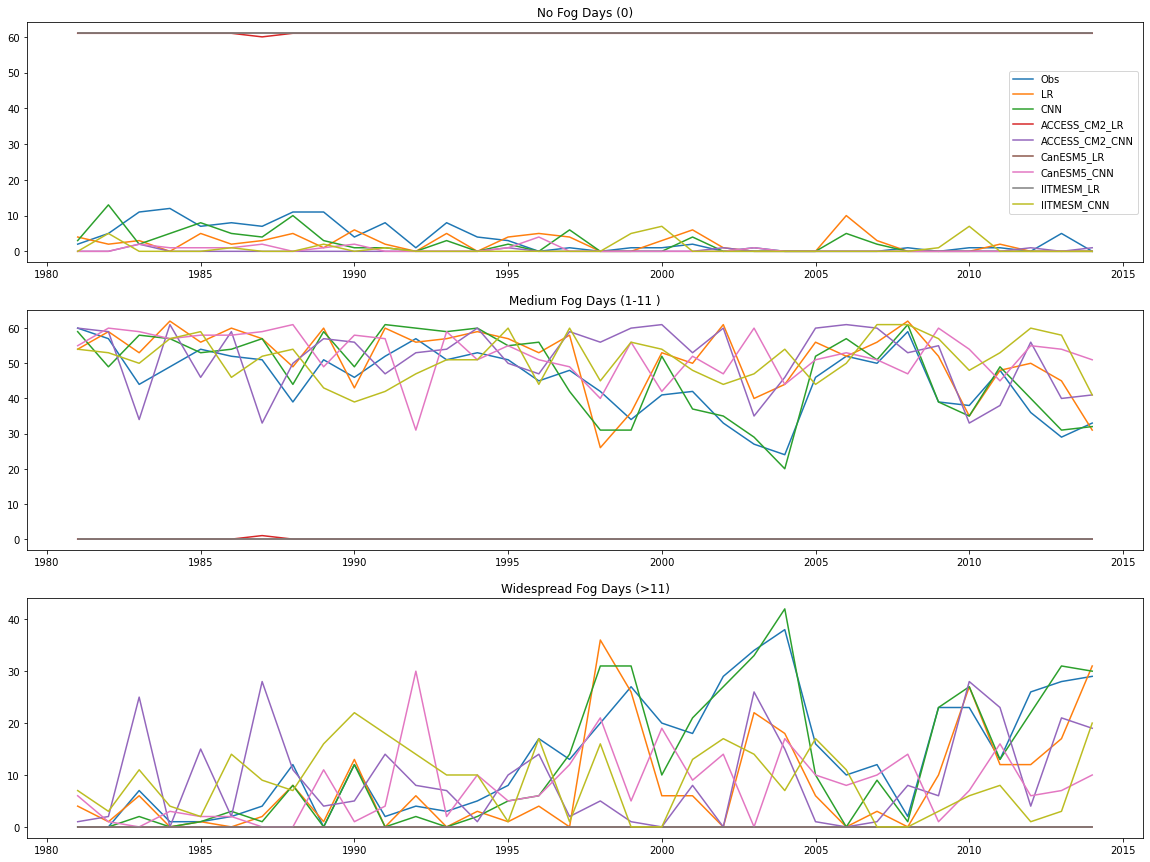

In [13]:
fig=plt.figure(figsize=[20,15])
X=np.arange(1981,2015)
ax = fig.add_subplot(311)
ax.plot(X,nO,label='Obs')
ax.plot(X,nLR,label='LR')
ax.plot(X,nCNN,label='CNN')
ax.plot(X,nACCESS_CM2_LR,label='ACCESS_CM2_LR')
ax.plot(X,nACCESS_CM2_CNN,label='ACCESS_CM2_CNN')
ax.plot(X,nCanESM5_LR,label='CanESM5_LR')
ax.plot(X,nCanESM5_CNN,label='CanESM5_CNN')
ax.plot(X,nIITMESM_LR,label='IITMESM_LR')
ax.plot(X,nIITMESM_CNN,label='IITMESM_CNN')

ax.legend()
ax.set_title('No Fog Days (0)')

ax1 = fig.add_subplot(312)
ax1.plot(X,medO)
ax1.plot(X,medLR)
ax1.plot(X,medCNN)
ax1.plot(X,medACCESS_CM2_LR)
ax1.plot(X,medACCESS_CM2_CNN)
ax1.plot(X,medCanESM5_LR)
ax1.plot(X,medCanESM5_CNN)
ax1.plot(X,medIITMESM_LR)
ax1.plot(X,medIITMESM_CNN)

#ax1.legend()
ax1.set_title('Medium Fog Days (1-11 )')

ax2 = fig.add_subplot(313)
ax2.plot(X,wdO)
ax2.plot(X,wdLR)
ax2.plot(X,wdCNN)
ax2.plot(X,wdACCESS_CM2_LR)
ax2.plot(X,wdACCESS_CM2_CNN)
ax2.plot(X,wdCanESM5_LR)
ax2.plot(X,wdCanESM5_CNN)
ax2.plot(X,wdIITMESM_LR)
ax2.plot(X,wdIITMESM_CNN)

#ax2.legend()
ax2.set_title('Widespread Fog Days (>11)' )

#plt.savefig('Obs_TS.png')

In [9]:
nO[0]+medO[0]+wdO[0]

62

In [10]:
nO[1]+medO[1]+wdO[1]

62

Text(0.5, 1.0, 'EC_Earth3_CNN')

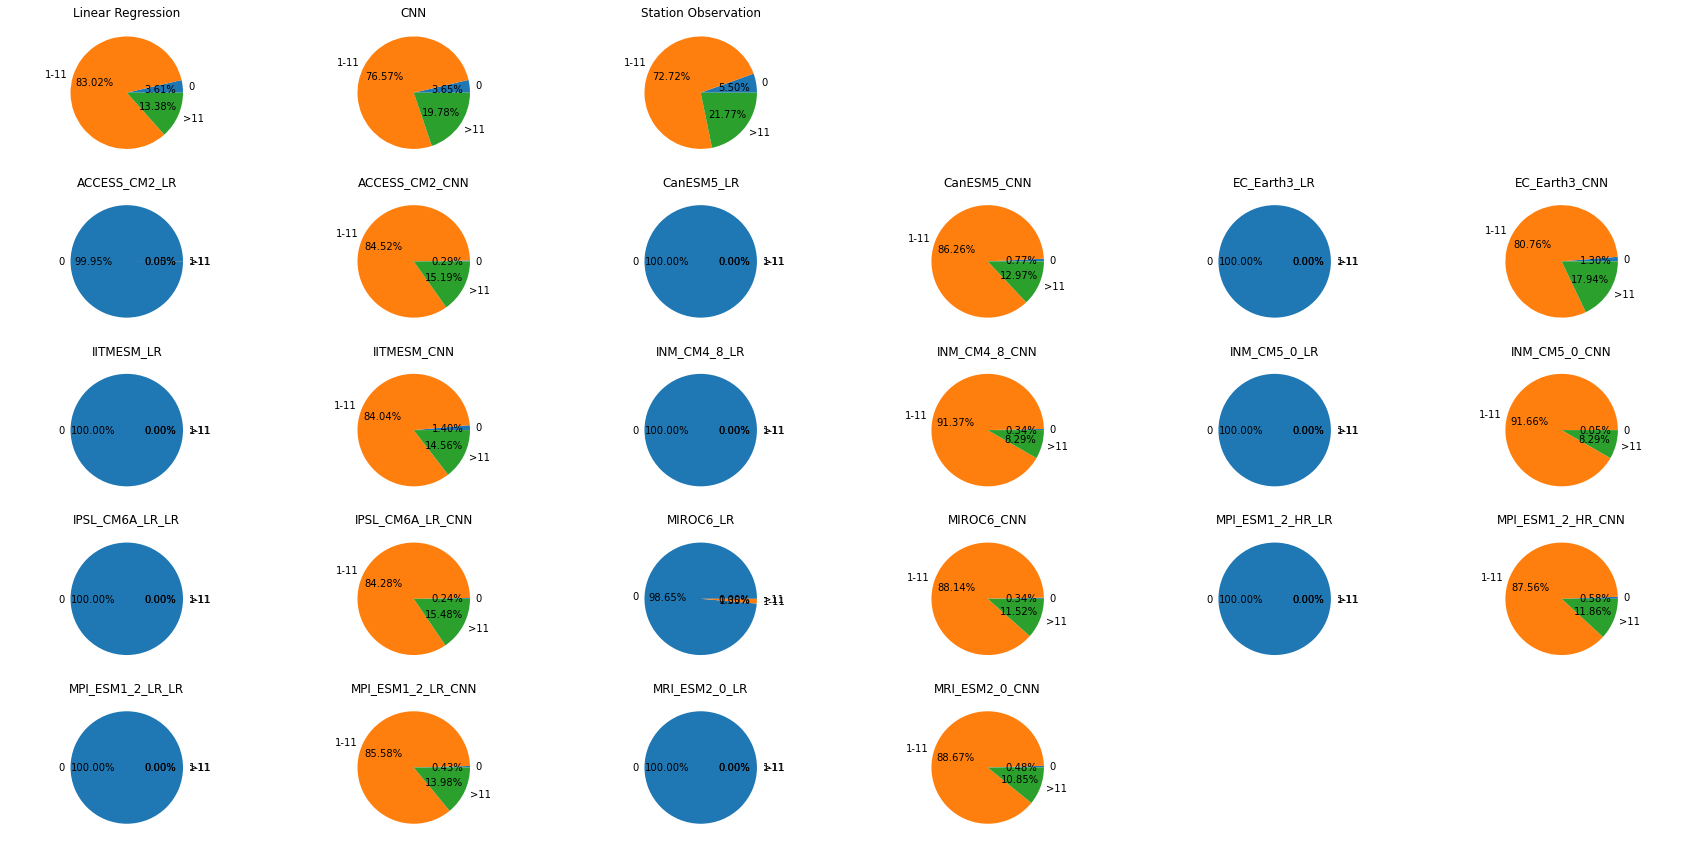

In [51]:
fig = plt.figure(figsize=(30,15))
pieLabs = ['0', '1-11', '>11']

ax2 = fig.add_subplot(5,6,3)
ax2.axis('equal')
#pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
ax2.pie([st.mean(nO),st.mean(medO),st.mean(wdO)], labels = pieLabs,autopct='%1.2f%%')
ax2.set_title('Station Observation')

ax3 = fig.add_subplot(5,6,1)
ax3.axis('equal')
#pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
ax3.pie([st.mean(nLR),st.mean(medLR),st.mean(wdLR)], labels = pieLabs,autopct='%1.2f%%')
ax3.set_title('Linear Regression')
#plt.savefig('Obs_pie.png')

ax = fig.add_subplot(5,6,2)
ax.axis('equal')
ax.pie([st.mean(nCNN),st.mean(medCNN),st.mean(wdCNN)], labels = pieLabs,autopct='%1.2f%%')
ax.set_title('CNN')

ax1 = fig.add_subplot(5,6,7)
ax1.axis('equal')
ax1.pie([st.mean(nACCESS_CM2_LR),st.mean(medACCESS_CM2_LR),st.mean(wdACCESS_CM2_LR)], labels = pieLabs,autopct='%1.2f%%')
ax1.set_title('ACCESS_CM2_LR')


ax4 = fig.add_subplot(5,6,8)
ax4.axis('equal')
ax4.pie([st.mean(nACCESS_CM2_CNN),st.mean(medACCESS_CM2_CNN),st.mean(wdACCESS_CM2_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax4.set_title('ACCESS_CM2_CNN')

ax5 = fig.add_subplot(5,6,9)
ax5.axis('equal')
ax5.pie([st.mean(nCanESM5_LR),st.mean(medCanESM5_LR),st.mean(wdCanESM5_LR)], labels = pieLabs,autopct='%1.2f%%')
ax5.set_title('CanESM5_LR')


ax6 = fig.add_subplot(5,6,10)
ax6.axis('equal')
ax6.pie([st.mean(nCanESM5_CNN),st.mean(medCanESM5_CNN),st.mean(wdCanESM5_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax6.set_title('CanESM5_CNN')

ax7 = fig.add_subplot(5,6,13)
ax7.axis('equal')
ax7.pie([st.mean(nIITMESM_LR),st.mean(medIITMESM_LR),st.mean(wdIITMESM_LR)], labels = pieLabs,autopct='%1.2f%%')
ax7.set_title('IITMESM_LR')


ax8 = fig.add_subplot(5,6,14)
ax8.axis('equal')
ax8.pie([st.mean(nIITMESM_CNN),st.mean(medIITMESM_CNN),st.mean(wdIITMESM_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax8.set_title('IITMESM_CNN')


ax13 = fig.add_subplot(5,6,17)
ax13.axis('equal')
ax13.pie([st.mean(nINM_CM5_0_LR),st.mean(medINM_CM5_0_LR),st.mean(wdINM_CM5_0_LR)], labels = pieLabs,autopct='%1.2f%%')
ax13.set_title('INM_CM5_0_LR')


ax14 = fig.add_subplot(5,6,18)
ax14.axis('equal')
ax14.pie([st.mean(nINM_CM5_0_CNN),st.mean(medINM_CM5_0_CNN),st.mean(wdINM_CM5_0_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax14.set_title('INM_CM5_0_CNN')

ax2= fig.add_subplot(5,6,19)
ax2.axis('equal')
ax2.pie([st.mean(nIPSL_CM6A_LR_LR),st.mean(medIPSL_CM6A_LR_LR),st.mean(wdIPSL_CM6A_LR_LR)], labels = pieLabs,autopct='%1.2f%%')
ax2.set_title('IPSL_CM6A_LR_LR')


ax3 = fig.add_subplot(5,6,20)
ax3.axis('equal')
ax3.pie([st.mean(nIPSL_CM6A_LR_CNN),st.mean(medIPSL_CM6A_LR_CNN),st.mean(wdIPSL_CM6A_LR_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax3.set_title('IPSL_CM6A_LR_CNN')

ax9= fig.add_subplot(5,6,21)
ax9.axis('equal')
ax9.pie([st.mean(nMIROC6_LR),st.mean(medMIROC6_LR),st.mean(wdMIROC6_LR)], labels = pieLabs,autopct='%1.2f%%')
ax9.set_title('MIROC6_LR')


ax10 = fig.add_subplot(5,6,22)
ax10.axis('equal')
ax10.pie([st.mean(nMIROC6_CNN),st.mean(medMIROC6_CNN),st.mean(wdMIROC6_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax10.set_title('MIROC6_CNN')

ax11= fig.add_subplot(5,6,27)
ax11.axis('equal')
ax11.pie([st.mean(nMRI_ESM2_0_LR),st.mean(medMRI_ESM2_0_LR),st.mean(wdMRI_ESM2_0_LR)], labels = pieLabs,autopct='%1.2f%%')
ax11.set_title('MRI_ESM2_0_LR')


ax12 = fig.add_subplot(5,6,28)
ax12.axis('equal')
ax12.pie([st.mean(nMRI_ESM2_0_CNN),st.mean(medMRI_ESM2_0_CNN),st.mean(wdMRI_ESM2_0_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax12.set_title('MRI_ESM2_0_CNN')

ax15= fig.add_subplot(5,6,25)
ax15.axis('equal')
ax15.pie([st.mean(nMPI_ESM1_2_LR_LR),st.mean(medMPI_ESM1_2_LR_LR),st.mean(wdMPI_ESM1_2_LR_LR)], labels = pieLabs,autopct='%1.2f%%')
ax15.set_title('MPI_ESM1_2_LR_LR')


ax16 = fig.add_subplot(5,6,26)
ax16.axis('equal')
ax16.pie([st.mean(nMPI_ESM1_2_LR_CNN),st.mean(medMPI_ESM1_2_LR_CNN),st.mean(wdMPI_ESM1_2_LR_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax16.set_title('MPI_ESM1_2_LR_CNN')


ax17 = fig.add_subplot(5,6,15)
ax17.axis('equal')
ax17.pie([st.mean(nINM_CM4_8_LR),st.mean(medINM_CM4_8_LR),st.mean(wdINM_CM4_8_LR)], labels = pieLabs,autopct='%1.2f%%')
ax17.set_title('INM_CM4_8_LR')


ax18 = fig.add_subplot(5,6,16)
ax18.axis('equal')
ax18.pie([st.mean(nINM_CM4_8_CNN),st.mean(medINM_CM4_8_CNN),st.mean(wdINM_CM4_8_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax18.set_title('INM_CM4_8_CNN')

ax19= fig.add_subplot(5,6,23)
ax19.axis('equal')
ax19.pie([st.mean(nMPI_ESM1_2_HR_LR),st.mean(medMPI_ESM1_2_HR_LR),st.mean(wdMPI_ESM1_2_HR_LR)], labels = pieLabs,autopct='%1.2f%%')
ax19.set_title('MPI_ESM1_2_HR_LR')


ax20 = fig.add_subplot(5,6,24)
ax20.axis('equal')
ax20.pie([st.mean(nMPI_ESM1_2_HR_CNN),st.mean(medMPI_ESM1_2_HR_CNN),st.mean(wdMPI_ESM1_2_HR_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax20.set_title('MPI_ESM1_2_HR_CNN')


ax21= fig.add_subplot(5,6,11)
ax21.axis('equal')
ax21.pie([st.mean(nEC_Earth3_LR),st.mean(medEC_Earth3_LR),st.mean(wdEC_Earth3_LR)], labels = pieLabs,autopct='%1.2f%%')
ax21.set_title('EC_Earth3_LR')


ax22 = fig.add_subplot(5,6,12)
ax22.axis('equal')
ax22.pie([st.mean(nEC_Earth3_CNN),st.mean(medEC_Earth3_CNN),st.mean(wdEC_Earth3_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax22.set_title('EC_Earth3_CNN')


Text(0.5, 1.0, 'MRI_ESM2_0_CNN')

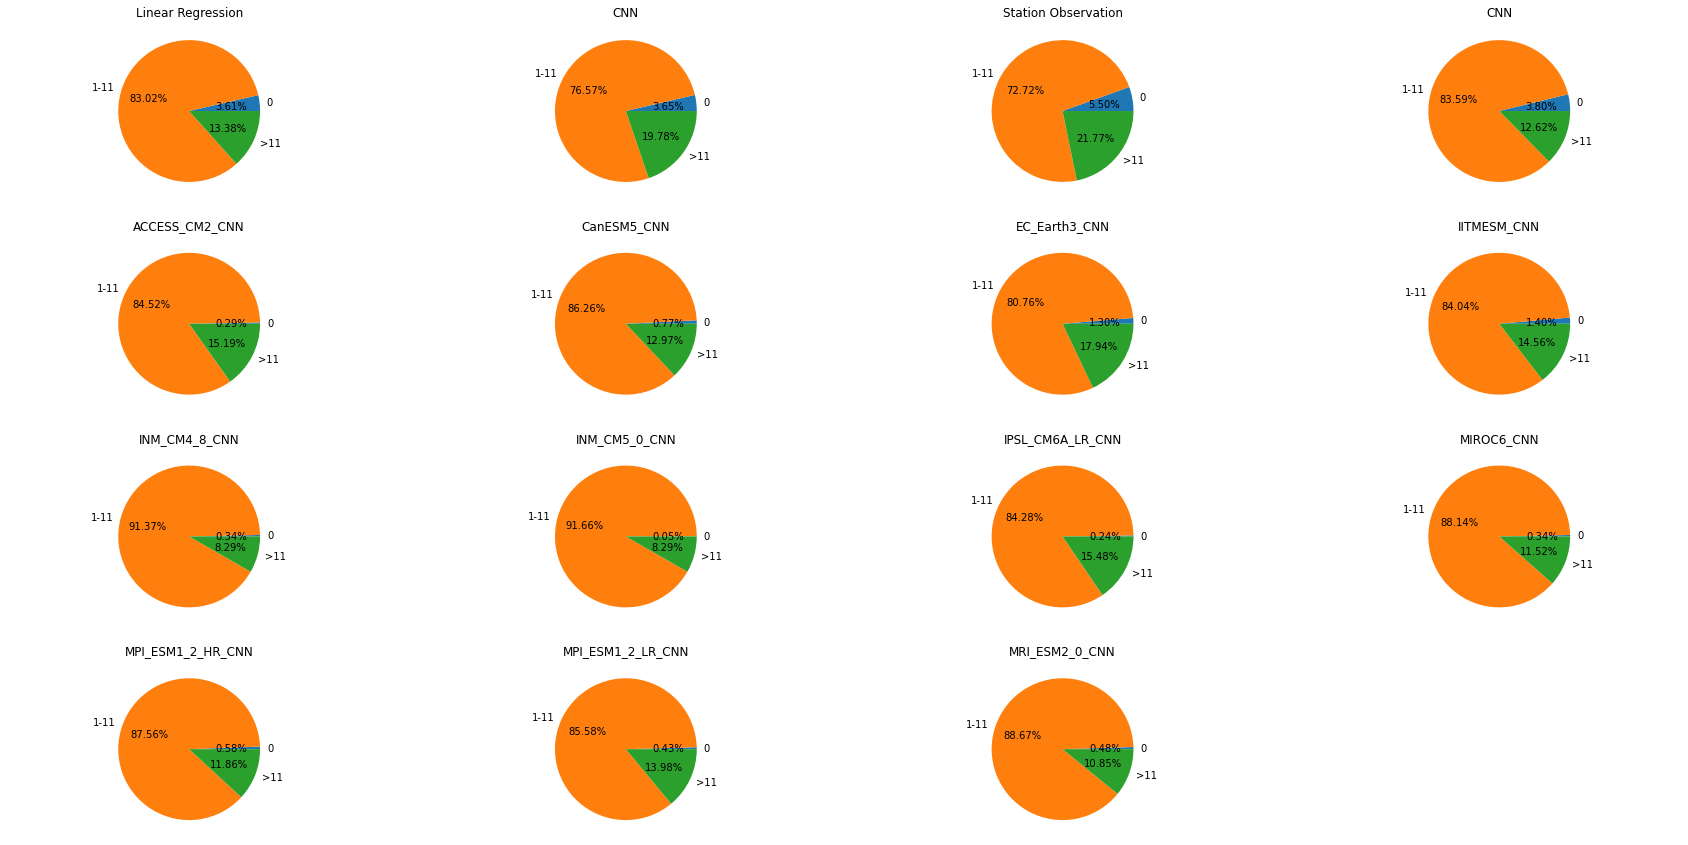

In [104]:
fig = plt.figure(figsize=(30,15))
pieLabs = ['0', '1-11', '>11']

ax2 = fig.add_subplot(4,4,3)
ax2.axis('equal')
#pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
ax2.pie([st.mean(nO),st.mean(medO),st.mean(wdO)], labels = pieLabs,autopct='%1.2f%%')
ax2.set_title('Station Observation')

ax3 = fig.add_subplot(4,4,1)
ax3.axis('equal')
#pieLabs = ['No Fog', 'Intermediate Fog (1-11)', 'Widespread Fog (>11)']
ax3.pie([st.mean(nLR),st.mean(medLR),st.mean(wdLR)], labels = pieLabs,autopct='%1.2f%%')
ax3.set_title('Linear Regression')
#plt.savefig('Obs_pie.png')

ax = fig.add_subplot(4,4,2)
ax.axis('equal')
ax.pie([st.mean(nCNN),st.mean(medCNN),st.mean(wdCNN)], labels = pieLabs,autopct='%1.2f%%')
ax.set_title('CNN')

ax1 = fig.add_subplot(4,4,4)
ax1.axis('equal')
ax1.pie([st.mean(nSVR),st.mean(medSVR),st.mean(wdSVR)], labels = pieLabs,autopct='%1.2f%%')
ax1.set_title('CNN')


ax4 = fig.add_subplot(4,4,5)
ax4.axis('equal')
ax4.pie([st.mean(nACCESS_CM2_CNN),st.mean(medACCESS_CM2_CNN),st.mean(wdACCESS_CM2_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax4.set_title('ACCESS_CM2_CNN')


ax6 = fig.add_subplot(4,4,6)
ax6.axis('equal')
ax6.pie([st.mean(nCanESM5_CNN),st.mean(medCanESM5_CNN),st.mean(wdCanESM5_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax6.set_title('CanESM5_CNN')


ax22 = fig.add_subplot(4,4,7)
ax22.axis('equal')
ax22.pie([st.mean(nEC_Earth3_CNN),st.mean(medEC_Earth3_CNN),st.mean(wdEC_Earth3_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax22.set_title('EC_Earth3_CNN')

ax8 = fig.add_subplot(4,4,8)
ax8.axis('equal')
ax8.pie([st.mean(nIITMESM_CNN),st.mean(medIITMESM_CNN),st.mean(wdIITMESM_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax8.set_title('IITMESM_CNN')

ax18 = fig.add_subplot(4,4,9)
ax18.axis('equal')
ax18.pie([st.mean(nINM_CM4_8_CNN),st.mean(medINM_CM4_8_CNN),st.mean(wdINM_CM4_8_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax18.set_title('INM_CM4_8_CNN')

ax14 = fig.add_subplot(4,4,10)
ax14.axis('equal')
ax14.pie([st.mean(nINM_CM5_0_CNN),st.mean(medINM_CM5_0_CNN),st.mean(wdINM_CM5_0_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax14.set_title('INM_CM5_0_CNN')
1

ax3 = fig.add_subplot(4,4,11)
ax3.axis('equal')
ax3.pie([st.mean(nIPSL_CM6A_LR_CNN),st.mean(medIPSL_CM6A_LR_CNN),st.mean(wdIPSL_CM6A_LR_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax3.set_title('IPSL_CM6A_LR_CNN')



ax10 = fig.add_subplot(4,4,12)
ax10.axis('equal')
ax10.pie([st.mean(nMIROC6_CNN),st.mean(medMIROC6_CNN),st.mean(wdMIROC6_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax10.set_title('MIROC6_CNN')

ax20 = fig.add_subplot(4,4,13)
ax20.axis('equal')
ax20.pie([st.mean(nMPI_ESM1_2_HR_CNN),st.mean(medMPI_ESM1_2_HR_CNN),st.mean(wdMPI_ESM1_2_HR_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax20.set_title('MPI_ESM1_2_HR_CNN')

ax16 = fig.add_subplot(4,4,14)
ax16.axis('equal')
ax16.pie([st.mean(nMPI_ESM1_2_LR_CNN),st.mean(medMPI_ESM1_2_LR_CNN),st.mean(wdMPI_ESM1_2_LR_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax16.set_title('MPI_ESM1_2_LR_CNN')

ax12 = fig.add_subplot(4,4,15)
ax12.axis('equal')
ax12.pie([st.mean(nMRI_ESM2_0_CNN),st.mean(medMRI_ESM2_0_CNN),st.mean(wdMRI_ESM2_0_CNN)], labels = pieLabs,autopct='%1.2f%%')
ax12.set_title('MRI_ESM2_0_CNN')

